In [1]:
import time

best_scores = {}
worst_scores = {}
import matplotlib.pyplot as plt

# A function to generate a bar graph from a dictionary d
def createBar(d, title, xlabel='', ylabel=''):
    plt.bar(range(len(d)), list(d.values()), align='center')
    plt.xticks(range(len(d)), list(d.keys()), rotation=20)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [2]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('cities.csv')
features = features.drop(['Unnamed: 18', 'doc_id', 'hotel_name', 'hotel_url', 'state', 'country', 'street', 'zip', 'class', 'price', 'COMFORT'],axis=1)

features = features[features.CLEANLINESS != 0]


In [3]:
features = pd.get_dummies(features)
features.iloc[:,:].head(5)

,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,overall_ratingsource,city_beijing,city_chicago,city_dubai,city_las vegas,city_london,city_montreal,city_new delhi,city_new york city,city_san francisco,city_shanghai
0,212,4.729508,4.655738,4.647541,4.844262,4.483607,4.672131,0,1,0,0,0,0,0,0,0,0
1,346,4.760797,4.558140,4.604651,4.794020,4.289037,4.601329,0,1,0,0,0,0,0,0,0,0
2,128,4.888889,4.842593,4.574074,4.861111,4.314815,4.696296,0,1,0,0,0,0,0,0,0,0
3,141,4.757576,4.590909,4.492424,4.742424,4.393939,4.595455,0,1,0,0,0,0,0,0,0,0
4,82,4.787500,4.600000,4.650000,4.725000,4.462500,4.645000,0,1,0,0,0,0,0,0,0,0


In [4]:
import numpy as np

predict = np.array(features['overall_ratingsource'])
# We want to predict cleanliness
features= features.drop(['overall_ratingsource'], axis = 1)
feature_list = list(features.columns)

features = np.array(features)

In [5]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, predict, test_size = 0.25, random_state = 42)


In [6]:
from sklearn.tree import DecisionTreeClassifier
print('-------DecisionTreeClassifier-------')

start = time.time()

tree = DecisionTreeClassifier(criterion='gini')
y = np.array(y_train).astype(int)
tree.fit(X_train, y)
yp = tree.predict(X_test)

y_test  = np.array(y_test).astype(int)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yp)
print('Accuracy: ' + str(accuracy))
best_scores['Decision Tree'] = accuracy
worst_scores['Decision Tree'] = accuracy

end = time.time()
DT_time = end-start

-------DecisionTreeClassifier-------
Accuracy: 0.9178470254957507


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
print('\n-------MultinomialNB-------')


start = time.time()

clf = MultinomialNB()
y = np.array(y_train).astype(int)
clf.fit(X_train, y)
yp = clf.predict(X_test)

y_test  = np.array(y_test).astype(float)
accuracy = accuracy_score(y_test, yp)
print('Accuracy: ' + str(accuracy))
best_scores['MultinomialNB'] = accuracy
worst_scores['MultinomialNB'] = accuracy

end = time.time()
NB_time = end - start


-------MultinomialNB-------
Accuracy: 0.24645892351274787


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print('\n-------LinearRegression-------')

start = time.time()

regression = LinearRegression()
regression.fit(X_train, y)
y_pred = regression.predict(X_test)

end = time.time()
LR_time = end - start
print('Explained Variance Score: ' + str(metrics.explained_variance_score(y_test, y_pred)))


-------LinearRegression-------
Explained Variance Score: 0.867843175278462


In [9]:
from sklearn.svm import SVC
print('\n-------SVC-------')


start = time.time()

c = [.01,.1, 1, 10, 20]
svc_accuracy = {}
best = 0
worst = 1000

for i in c:
    svc = SVC(kernel = 'linear', C=i)
    y = np.array(y_train).astype(int)
    svc.fit(X_train, y)
    yp = svc.predict(X_test)
    y_test  = np.array(y_test).astype(float)
    accuracy = accuracy_score(y_test, yp)
    if accuracy > best:
        best = accuracy
    if accuracy < worst:
        worst = accuracy
    svc_accuracy[str(i)] = accuracy
    print('Accuracy score of hyperparamater C at {:f} = {:f}'.format(i,accuracy))

best_scores['SVC'] = best
worst_scores['SVC'] = worst

end = time.time()
SVC_time = end-start


-------SVC-------
Accuracy score of hyperparamater C at 0.010000 = 0.943343
Accuracy score of hyperparamater C at 0.100000 = 0.963173
Accuracy score of hyperparamater C at 1.000000 = 0.977337
Accuracy score of hyperparamater C at 10.000000 = 0.981586
Accuracy score of hyperparamater C at 20.000000 = 0.981586


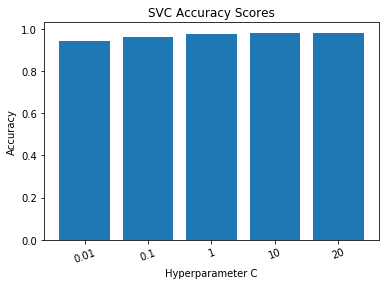

In [24]:
createBar(svc_accuracy, 'SVC Accuracy Scores', 'Hyperparameter C', 'Accuracy')

In [11]:
from sklearn.ensemble import RandomForestClassifier
print('\n-------RandomForestClassifier-------')

start = time.time()

estimators=[20, 100, 500, 1000]
best = 0
worst = 1000
rfc_accuracy = {}
for x in estimators: 
    model = RandomForestClassifier(n_estimators=x)
    y = np.array(y_train).astype(int)
    model.fit(X_train, y)
    yp = model.predict(X_test)
    y_test  = np.array(y_test).astype(float)
    accuracy = accuracy_score(y_test, yp)
    rfc_accuracy[str(x)] = accuracy
    if accuracy > best:
        best = accuracy
    if accuracy < worst:
        worst = accuracy
    print('Accuracy score for hyper paramater: n_estimators at {:f} = {:f}'.format(x,accuracy))
best_scores['RandomForestClassifier'] = best
worst_scores['RandomForestClassifier'] = worst

end = time.time()
RF_time = end - start


-------RandomForestClassifier-------


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy score for hyper paramater: n_estimators at 20.000000 = 0.941926
Accuracy score for hyper paramater: n_estimators at 100.000000 = 0.943343
Accuracy score for hyper paramater: n_estimators at 500.000000 = 0.943343
Accuracy score for hyper paramater: n_estimators at 1000.000000 = 0.946176


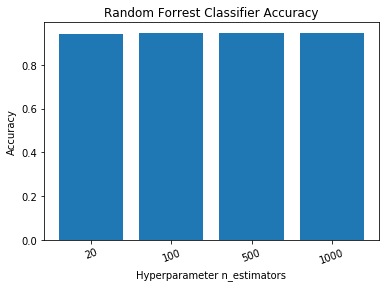

In [19]:
createBar(rfc_accuracy, "Random Forrest Classifier Accuracy", 'Hyperparameter n_estimators', 'Accuracy')

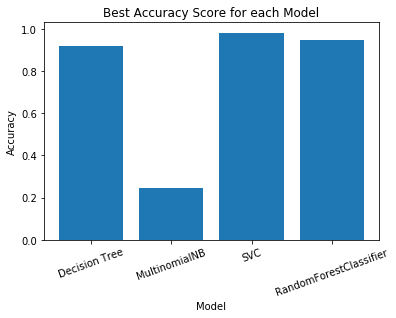

In [20]:
createBar(best_scores, 'Best Accuracy Score for each Model', 'Model', 'Accuracy')

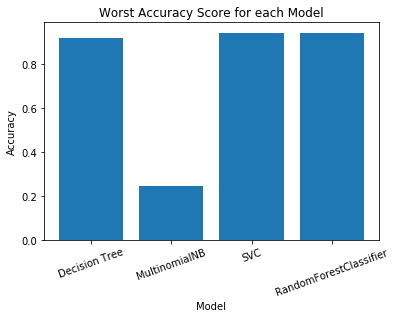

In [21]:
createBar(worst_scores, 'Worst Accuracy Score for each Model', 'Model', 'Accuracy')

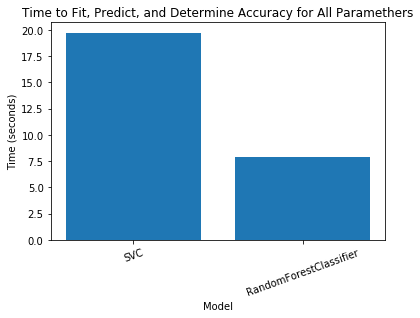

In [22]:
times = {'SVC': SVC_time, 'RandomForestClassifier': RF_time}
createBar(times, 'Time to Fit, Predict, and Determine Accuracy for All Paramethers', 'Model', 'Time (seconds)')

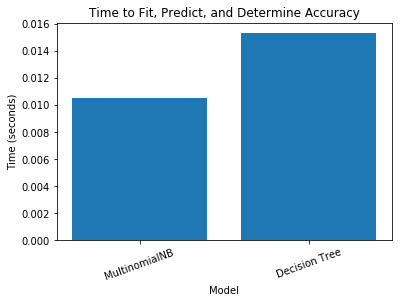

In [23]:
times = {'MultinomialNB': NB_time, 'Decision Tree': DT_time}
createBar(times, 'Time to Fit, Predict, and Determine Accuracy', 'Model', 'Time (seconds)')